## Ejercicios de pair programming 25 enero: Metricas

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. 

Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:

-Calculéis las métricas para vuestro modelo

-Discutid los resultados de las métricas y extraed conclusiones

-Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
# Abrimos nuestro DataFrame
df = pd.read_csv("archive/encoding.csv", index_col = 0)
df.reset_index(inplace= True)


In [8]:
df.drop(["region", "region.1"], axis = 1, inplace = True)

In [9]:
df.head()

,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,-0.993631,7.587,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617,0,0,0,0,0,0,0,0,0,1
1,-0.980892,7.561,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398,0,0,0,0,0,0,0,0,0,1
2,-0.968153,7.527,0.555780,1.216329,0.636395,1.069507,3.217869,0.767717,0.413316,0,0,0,0,0,0,0,0,0,1
3,-0.955414,7.522,0.766346,1.131058,0.665118,1.161655,2.207255,0.802712,0.373969,0,0,0,0,0,0,0,0,0,1
4,-0.942675,7.427,0.557057,1.107057,0.720608,0.995200,1.904941,1.497125,0.354023,0,0,0,0,0,1,0,0,0,0


In [10]:
X = df.drop("happiness_score", axis = 1)
y = df["happiness_score"]

In [11]:
X.head()

,happiness_rank,economy,family,health,freedom,trust,generosity,dystopia_residual,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,-0.993631,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617,0,0,0,0,0,0,0,0,0,1
1,-0.980892,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398,0,0,0,0,0,0,0,0,0,1
2,-0.968153,0.555780,1.216329,0.636395,1.069507,3.217869,0.767717,0.413316,0,0,0,0,0,0,0,0,0,1
3,-0.955414,0.766346,1.131058,0.665118,1.161655,2.207255,0.802712,0.373969,0,0,0,0,0,0,0,0,0,1
4,-0.942675,0.557057,1.107057,0.720608,0.995200,1.904941,1.497125,0.354023,0,0,0,0,0,1,0,0,0,0


In [12]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: happiness_score, dtype: float64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
lr = LinearRegression(n_jobs=-1)

In [15]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [16]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [17]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
221,5.743,5.742912,Train
132,4.252,4.252016,Train
155,3.006,3.006354,Train
94,4.959,4.959398,Train
245,5.161,5.161057,Train


In [18]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
221,5.743,5.742912,Train,0.000088
132,4.252,4.252016,Train,-0.000016
155,3.006,3.006354,Train,-0.000354
94,4.959,4.959398,Train,-0.000398
245,5.161,5.161057,Train,-0.000057


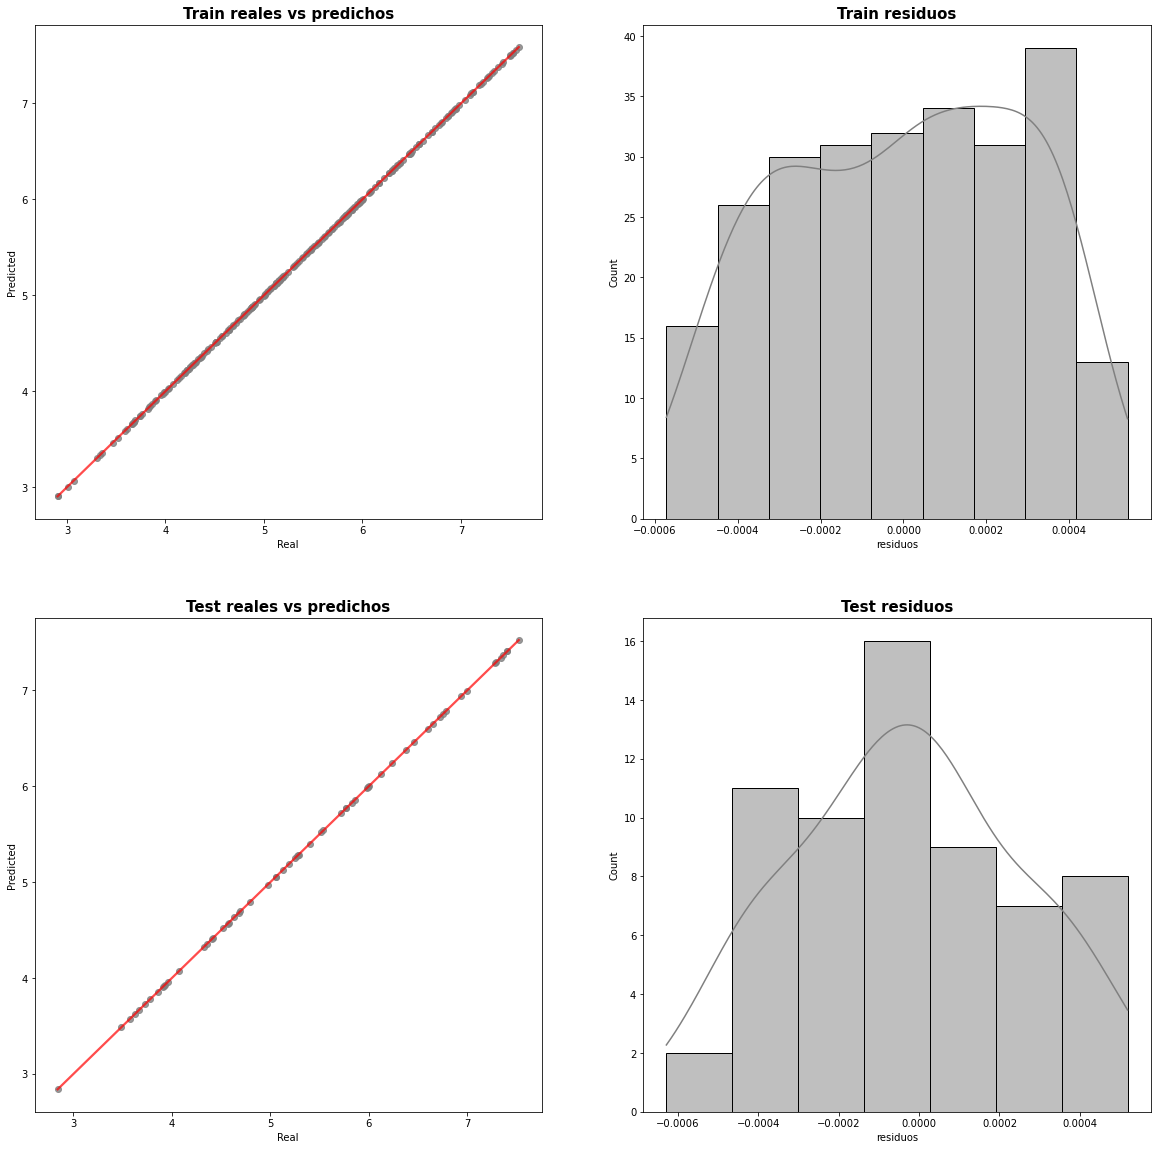

In [19]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [20]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9999999343475241
El MAE es 0.0002471806908537264
El MSE es 8.235728169909029e-08
EL RMSE es  0.0002869795841154738
Para el conjunto test:---------------
El valor de r2 score es  0.999999945807003
El MAE es 0.00022940215427380385
El MSE es 8.003912941343903e-08
EL RMSE es  0.0002829118757023802


In [21]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.000229,8.003913e-08,0.000283,1.0,test,Linear Regresion
1,0.000247,8.235728e-08,0.000287,1.0,train,LinearRegression


In [24]:
df_resultados.to_csv("archive/resultados_RL_happiness.csv")

In [25]:
resultados

,Real,Predicted,Set,residuos
221,5.743,5.742912,Train,0.000088
132,4.252,4.252016,Train,-0.000016
155,3.006,3.006354,Train,-0.000354
94,4.959,4.959398,Train,-0.000398
245,5.161,5.161057,Train,-0.000057
...,...,...,...,...
292,4.073,4.073163,Test,-0.000163
184,6.596,6.596313,Test,-0.000313
269,4.575,4.574890,Test,0.000110
173,6.994,6.994441,Test,-0.000441
